<a href="https://colab.research.google.com/github/Meguazy/HACK_4DS/blob/main/notebooks_luca/DAY1_HACK4DS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!git clone https://github.com/Meguazy/HACK_4DS.git

Cloning into 'HACK_4DS'...
remote: Enumerating objects: 34, done.
remote: Counting objects: 100% (34/34), done.
remote: Compressing objects: 100% (28/28), done.
remote: Total 34 (delta 7), reused 1 (delta 0), pack-reused 0
Receiving objects: 100% (34/34), 5.50 MiB | 5.67 MiB/s, done.
Resolving deltas: 100% (7/7), done.


In [51]:
!git pull

remote: Enumerating objects: 6, done.
remote: Counting objects: 100% (6/6), done.
remote: Compressing objects: 100% (4/4), done.
remote: Total 4 (delta 1), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (4/4), 1.82 MiB | 3.34 MiB/s, done.
From https://github.com/Meguazy/HACK_4DS
   390b563..22974ad  main       -> origin/main
Updating 390b563..22974ad
Fast-forward
 data/dropped.csv | 32033 +++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
 1 file changed, 32033 insertions(+)
 create mode 100644 data/dropped.csv


In [4]:
%cd HACK_4DS

/content/HACK_4DS


In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [8]:
df_train = pd.read_csv("data/train_set.csv", sep=";", quotechar="\"", decimal=",")

In [9]:
df_test = pd.read_csv("data/test_set.csv", sep=";", quotechar="\"", decimal=",")

In [36]:
df_train.external_score_ver03.unique()

array(['MISSING', 'H', 'C', 'E', 'G', 'F', 'D', 'I', 'M', 'L', 'A', 'O',
       'P', 'N', 'B'], dtype=object)

In [13]:
external_score_ver03_dictionary = {
    "MISSING":None,
    "A":14,
    "B":13,
    "C":12,
    "D":11,
    "E":10,
    "F":9,
    "G":8,
    "H":7,
    "I":6,
    "L":5,
    "M":4,
    "N":3,
    "O":2,
    "P":1
}

df_train = df_train.replace({"external_score_ver03": external_score_ver03_dictionary})

,application_ID,decision_date,company_ID,external_score_ver01,external_score_ver02,late_payment_score,external_score_late_payment_integrated,external_score_moderate,external_score_adverse,external_score_ver03,...,avg_count_enti_affidanti,std_count_enti_affidanti,max_count_enti_affidanti,last_count_enti_affidanti,avg_count_numero_prima_info,std_count_numero_prima_info,max_count_numero_prima_info,last_count_numero_prima_info,days_to_default,target
0,a1Q7R00000ej2yjUAA,2021-11-30,7.256588e+09,10,3,NaN,NaN,NaN,NaN,NaN,...,1.000000,0.000000,1,1,0.0,0.000000,0,0,522,1
1,a1Q2X00000ZWC5LUAX,2020-10-06,6.178307e+09,7,3,NaN,NaN,NaN,NaN,7.0,...,1.000000,0.000000,1,1,2.0,0.000000,2,2,1498,0
2,a1Q2X00000XcCCQUA3,2020-02-11,7.692855e+09,7,3,NaN,NaN,NaN,NaN,NaN,...,1.000000,0.000000,1,1,1.0,0.000000,1,1,779,1
3,a1Q7R00000ejSs3UAE,2022-01-18,5.752242e+09,8,2,NaN,NaN,NaN,NaN,NaN,...,1.000000,0.000000,1,1,0.5,0.522233,1,0,1498,0
4,a1Q7R00000eiRidUAE,2021-09-16,7.533507e+09,4,1,NaN,NaN,NaN,NaN,NaN,...,0.000000,0.000000,0,0,0.0,0.000000,0,0,1498,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32027,a1Q7R00000a2mlUUAQ,2021-03-12,4.270447e+09,8,1,NaN,NaN,NaN,NaN,10.0,...,7.083333,1.311372,8,7,1.5,2.713602,6,0,894,1
32028,a1Q7R00000a302dUAA,2021-05-06,7.809509e+09,5,1,NaN,NaN,NaN,NaN,5.0,...,4.583333,0.900337,6,5,4.0,0.000000,4,4,1498,0
32029,a1Q7R00000aBD7ZUAW,2021-08-11,3.093873e+09,5,1,NaN,NaN,NaN,NaN,10.0,...,3.000000,0.000000,3,3,1.0,0.000000,1,1,1498,0
32030,a1Q7R00000c7hlPUAQ,2022-06-07,5.879529e+09,7,1,NaN,NaN,NaN,NaN,9.0,...,5.333333,0.492366,6,6,0.0,0.000000,0,0,87,1


In [ ]:
df_train[["application_ID", "decision_date", "province", "juridical_form", "industry_sector", "region", "geo_area"]] = df_train[["application_ID", "decision_date", "province", "juridical_form", "industry_sector", "region", "geo_area"]].astype(str)

In [32]:
len(df_train[["juridical_form", "target"]].value_counts())

24

In [33]:
len(df_train["juridical_form"].unique())

14

In [49]:
# Drop juridical_form
drop_columns = ["application_ID", "company_ID",
                "cr_available", "province", "core_income_ratio", "geo_area", "region", "juridical_form", "industry_sector",
                "std_tension_a_revoca_autoliquidanti", "avg_tension_a_revoca_autoliquidanti", "last_tension_a_revoca_autoliquidanti",
                "last_rel_used_a_revoca_autoliquidanti", "avg_rel_used_a_revoca_autoliquidanti", "max_rel_used_a_revoca_autoliquidanti",
                "avg_rel_used_a_scadenza", "last_rel_used_a_scadenza", "max_rel_used_a_scadenza",
                "avg_count_enti_affidanti", "last_count_enti_affidanti" , "max_count_enti_affidanti",
                "std_count_numero_prima_info", "last_count_numero_prima_info", "avg_count_numero_prima_info",
                "days_to_deafult", "cr_available"]

In [50]:
len(drop_columns)

26

In [42]:
location_features = ["province", "region", "geo_area", "industry_sector"]

In [40]:
print(len(df_train.columns))
print(len(df_test.columns))

48
46


<Figure size 1000x600 with 0 Axes>

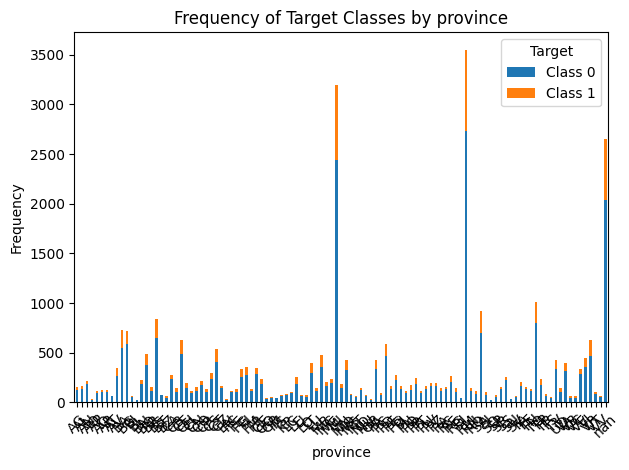

<Figure size 1000x600 with 0 Axes>

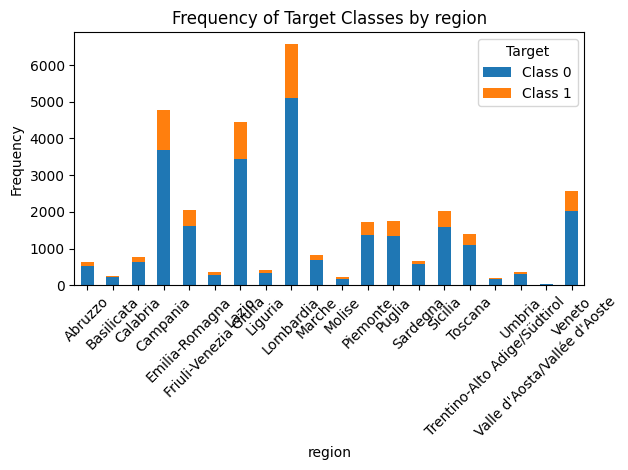

<Figure size 1000x600 with 0 Axes>

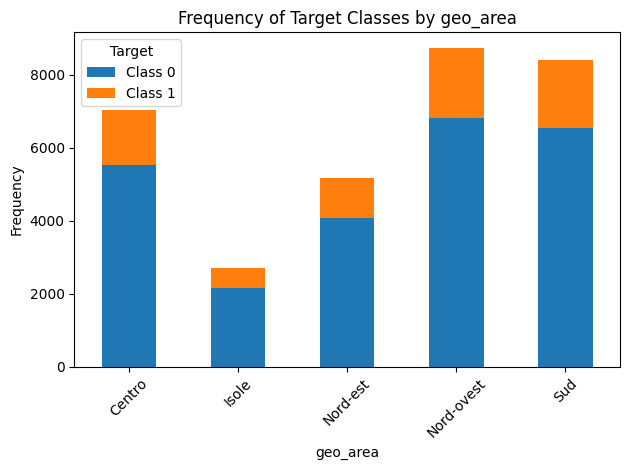

<Figure size 1000x600 with 0 Axes>

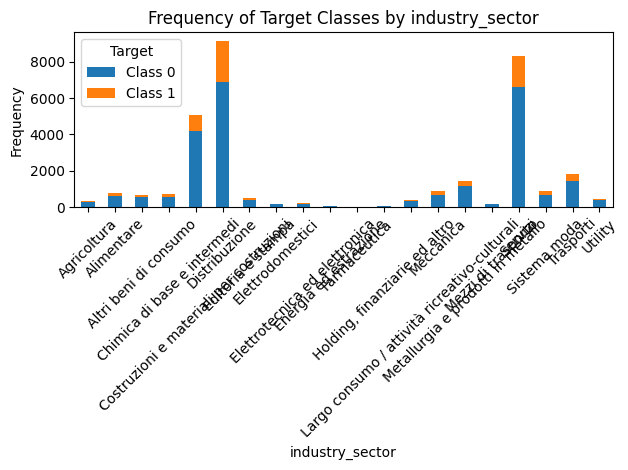

In [48]:
for column in location_features:
  province_target_freq = df_train.groupby([column, 'target']).size().unstack(fill_value=0)
  # Plotting
  plt.figure(figsize=(10, 6))
  province_target_freq.plot(kind='bar', stacked=True)
  plt.xlabel(column)
  plt.ylabel('Frequency')
  plt.title('Frequency of Target Classes by ' + column)
  plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
  plt.legend(title='Target', labels=['Class 0', 'Class 1'])
  plt.tight_layout()
  plt.show()

# PCA on Dropped dataset

In [119]:
!pip install lightgbm imbalanced-learn

In [200]:
df_dropped = pd.read_csv("data/dropped.csv")

In [197]:
from sklearn.decomposition import PCA
from sklearn_pandas import DataFrameMapper
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.linear_model import SGDClassifier

import lightgbm as lgb
from imblearn.under_sampling import RandomUnderSampler

In [201]:
pca_columns = ['external_score_ver01',
       'external_score_ver02', 'late_payment_score',
       'external_score_late_payment_integrated', 'external_score_moderate',
       'external_score_adverse', 'external_score_ver03', 'age',
       'gross_margin_ratio', 'cash_asset_ratio',
       'consolidated_liabilities_ratio', 'tangible_assets_ratio', 'revenues',
       'last_statement_age', 'overrun_freq_a_revoca_autoliquidanti',
       'max_tension_a_revoca_autoliquidanti',
       'std_rel_used_a_revoca_autoliquidanti', 'overrun_freq_a_scadenza',
       'std_rel_used_a_scadenza', 'std_count_enti_affidanti',
       'max_count_numero_prima_info', 'decision_month']

In [88]:
mapper = DataFrameMapper([(pca_columns, StandardScaler())])
scaled_features = mapper.fit_transform(df_dropped[pca_columns].copy(), len(pca_columns))
concatDatasetScaled = pd.DataFrame(scaled_features, index=df_dropped[pca_columns].index, columns=pca_columns)

In [103]:
# to avoid overfitting
pca = PCA(n_components = 13)

pca_array = pca.fit_transform(concatDatasetScaled)

df_pca = pd.DataFrame(pca_array)

# df_dropped[['principal_component_1', 'principal_component_2']] = pca.fit_transform(concatDatasetScaled)

In [ ]:
df_pca

In [105]:
df_pca_concat = pd.concat([df_pca, df_dropped.target], axis = 1)

In [107]:
df_pca_concat

,0,1,2,3,4,5,6,7,8,9,10,11,12,target
0,-0.927900,-1.031397,1.232668,-1.385582,0.365556,-0.833498,-0.379105,1.235146,-0.397577,-0.104046,-0.652859,0.509002,-0.400694,1
1,-0.291559,-1.438432,-0.091433,0.068247,-0.219611,0.582989,0.175772,0.906724,0.003847,-0.636541,0.137123,0.531271,-0.335725,0
2,-0.382030,-1.725135,-0.403738,0.788630,-0.380722,0.604955,-0.445112,-1.246649,0.033274,-0.168543,-0.316494,0.679774,-0.009266,1
3,-0.134068,-0.993284,-0.111947,2.105197,-0.908539,-0.011098,0.462913,-0.880258,-0.041442,-1.022167,-0.749733,-1.237315,-0.283411,0
4,0.660255,-0.563257,-1.165842,-0.154215,0.017037,-0.479759,0.035812,-0.318406,-0.111523,1.196868,-0.226981,-0.128638,0.567926,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32027,-0.097037,2.729446,0.520108,1.290315,-0.443590,2.482005,0.293427,-1.339436,0.662690,-1.276025,-0.501409,-1.437287,-1.292676,1
32028,0.168361,3.096407,1.882935,0.934736,-0.068319,0.771437,1.206925,-1.226184,1.030722,0.838494,4.347766,0.698748,0.245133,0
32029,0.541933,0.249750,-0.856460,-0.878459,0.538674,-0.306570,0.438554,-0.432679,-0.075383,0.469970,-0.285142,-0.687464,0.421721,0
32030,0.062916,0.649519,0.197252,0.343325,-0.273125,-0.201872,-0.655236,-0.722373,-0.092184,0.864158,-0.309595,-0.443515,0.272228,1


## LightGBM

In [112]:
X_train, X_test, y_train, y_test = train_test_split(df_pca_concat.iloc[:,0:13], df_pca_concat.target, test_size=0.2, random_state=42)

In [123]:
# Applying undersampling
undersampler = RandomUnderSampler(random_state=42)
X_resampled, y_resampled = undersampler.fit_resample(X_train, y_train)

In [124]:
# Creating a LightGBM dataset
train_data = lgb.Dataset(X_resampled, label=y_resampled)

In [125]:
# Setting up parameters for LightGBM
params = {
    'objective': 'binary',
    'metric': 'binary_error'  # You can change the metric as per your requirement
}

In [167]:
# Training the model
num_round = 50
bst = lgb.train(params, train_data, num_round)

[LightGBM] [Info] Number of positive: 5545, number of negative: 5545
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001494 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3315
[LightGBM] [Info] Number of data points in the train set: 11090, number of used features: 13
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000


In [168]:
# Making predictions
y_pred_lgbm = bst.predict(X_test, num_iteration=bst.best_iteration)

In [169]:
# Converting probabilities to binary predictions
y_pred_binary = [1 if pred > 0.5 else 0 for pred in y_pred_lgbm]

In [170]:
print("Accuracy: ", accuracy_score(y_test, y_pred_binary))
print("F1 score:", f1_score(y_test, y_pred_binary))

Accuracy:  0.6569377243639769
F1 score: 0.444949494949495


In [133]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred_binary)

TN, FP, FN, TP = confusion_matrix(y_test, y_pred_binary).ravel()

print('True Positive(TP)  = ', TP)
print('False Positive(FP) = ', FP)
print('True Negative(TN)  = ', TN)
print('False Negative(FN) = ', FN)

True Positive(TP)  =  886
False Positive(FP) =  1769
True Negative(TN)  =  3289
False Negative(FN) =  463


## SGDClassifier

In [202]:
X_train, X_test, y_train, y_test = train_test_split(df_dropped[pca_columns], df_pca_concat.target, test_size=0.2, random_state=42)

In [203]:
# Initializing the SGDClassifier
sgd_classifier = SGDClassifier(alpha=0.001, learning_rate='optimal', loss='hinge', max_iter=1000, penalty='l1', random_state=42)

In [204]:
# Training the classifier
sgd_classifier.fit(X_train, y_train)

SGDClassifier(alpha=0.001, penalty='l1', random_state=42)

In [205]:
# Making predictions
y_pred_sgd = sgd_classifier.predict(X_test)

print("Accuracy: ", accuracy_score(y_test, y_pred_sgd))
print("F1 score:", f1_score(y_test, y_pred_sgd))

Accuracy:  0.7493366630248166
F1 score: 0.347684809098294


# No PCA classes

In [206]:
df_dropped_all = df_dropped[pca_columns]

In [207]:
# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df_dropped_all, df_dropped.target, test_size=0.2, random_state=42)

# Applying undersampling
undersampler = RandomUnderSampler(random_state=42)
X_resampled, y_resampled = undersampler.fit_resample(X_train, y_train)

# Creating a LightGBM dataset
train_data = lgb.Dataset(X_resampled, label=y_resampled)

# Setting up parameters for LightGBM
params = {
    'objective': 'binary',
    'metric': 'binary_error'  # You can change the metric as per your requirement
}

# Training the model
num_round = 100
bst = lgb.train(params, train_data, num_round)

# Making predictions
y_pred = bst.predict(X_test, num_iteration=bst.best_iteration)

# Converting probabilities to binary predictions
y_pred_binary = [1 if pred > 0.5 else 0 for pred in y_pred]

# Calculating F1 score
f1 = f1_score(y_test, y_pred_binary)
print("F1 score:", f1)

[LightGBM] [Info] Number of positive: 5545, number of negative: 5545
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001387 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2366
[LightGBM] [Info] Number of data points in the train set: 11090, number of used features: 22
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
F1 score: 0.4863301787592009
